# Perceptron

## Drawbacks

* Works only when data is linearly separable.

## Code Implementation for Perceptron

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib

plt.style.use("fivethirtyeight")

In [2]:
class Perceptron:
    def __init__(self, eta, epochs):
        self.weights= np.random.randn(3)*1e-4
        self.eta = eta
        self.epochs =epochs
    
    def activationFunction(self,inputs, weights):
        return np.where(np.dot(inputs, weights)>0,1,0)
    
    def fit(self, X,y):
        self.X = X
        self.y = y
        
        print(f"X original-\n {self.X}")
        X_with_bias = np.c_[self.X, -np.ones(shape=(len(self.X),1))]
        print(f"\nX with bias-\n {pd.DataFrame(X_with_bias)}")
        
        for epoch in range(self.epochs):
            actual_epoch = epoch+1
            print(f"\nEpoch no- {actual_epoch}")
            y_hat=self.activationFunction(X_with_bias, self.weights)
            print(f"\nPredicted Value- {y_hat}")
            error=self.y-y_hat
            print(f"\nError-\n{error}")
            error_sum = np.sum(np.abs(error))
            print(f"\nAbsolute Error- {error_sum}")
            print(f"Weights before update- {self.weights}")
            
            if(error_sum==0):
                print(f"\nModel convergence completed on epoch-{actual_epoch}!!")
                break
            ##weight update logic for perceptron
            self.weights = self.weights + self.eta* np.dot(X_with_bias.T,error)
            print(f"Weights after update- {self.weights}")
            
    def predict(self, X):
        X_with_bias = np.c_[X,-np.ones(shape=(len(X),1))]
        return self.activationFunction(X_with_bias, self.weights)

### AND

In [4]:
data={"x1":[0,0,1,1],"x2":[0,1,0,1],"y":[0,0,0,1]}
AND = pd.DataFrame(data)
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [5]:
X = AND.drop("y",axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [6]:
y=AND["y"]
y

0    0
1    0
2    0
3    1
Name: y, dtype: int64

In [11]:
model = Perceptron(eta=0.01, epochs=10)

In [12]:
model.fit(X,y)

X original-
    x1  x2
0   0   0
1   0   1
2   1   0
3   1   1

X with bias-
      0    1    2
0  0.0  0.0 -1.0
1  0.0  1.0 -1.0
2  1.0  0.0 -1.0
3  1.0  1.0 -1.0

Epoch no- 1

Predicted Value- [1 1 0 1]

Error-
0   -1
1   -1
2    0
3    0
Name: y, dtype: int64

Absolute Error- 2
Weights before update- [-5.13914432e-05  1.27305419e-04 -2.10115545e-06]
Weights after update- [-5.13914432e-05 -9.87269458e-03  1.99978988e-02]

Epoch no- 2

Predicted Value- [0 0 0 0]

Error-
0    0
1    0
2    0
3    1
Name: y, dtype: int64

Absolute Error- 1
Weights before update- [-5.13914432e-05 -9.87269458e-03  1.99978988e-02]
Weights after update- [0.00994861 0.00012731 0.0099979 ]

Epoch no- 3

Predicted Value- [0 0 0 1]

Error-
0    0
1    0
2    0
3    0
Name: y, dtype: int64

Absolute Error- 0
Weights before update- [0.00994861 0.00012731 0.0099979 ]

Model convergence completed on epoch-3!!


In [23]:
model.predict(X)

array([0, 0, 0, 1])

### OR

In [13]:
data={"x1":[0,0,1,1],"x2":[0,1,0,1],"y":[0,1,1,1]}
OR = pd.DataFrame(data)
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [14]:
X = OR.drop("y",axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [15]:
y= OR["y"]
y.to_frame()

,y
0,0
1,1
2,1
3,1


In [16]:
model_or = Perceptron(eta=0.1,epochs=10)

In [17]:
model_or.fit(X,y)

X original-
    x1  x2
0   0   0
1   0   1
2   1   0
3   1   1

X with bias-
      0    1    2
0  0.0  0.0 -1.0
1  0.0  1.0 -1.0
2  1.0  0.0 -1.0
3  1.0  1.0 -1.0

Epoch no- 1

Predicted Value- [0 0 0 0]

Error-
0    0
1    1
2    1
3    1
Name: y, dtype: int64

Absolute Error- 3
Weights before update- [-5.57482711e-05 -1.79998556e-05  1.32346451e-04]
Weights after update- [ 0.19994425  0.199982   -0.29986765]

Epoch no- 2

Predicted Value- [1 1 1 1]

Error-
0   -1
1    0
2    0
3    0
Name: y, dtype: int64

Absolute Error- 1
Weights before update- [ 0.19994425  0.199982   -0.29986765]
Weights after update- [ 0.19994425  0.199982   -0.19986765]

Epoch no- 3

Predicted Value- [1 1 1 1]

Error-
0   -1
1    0
2    0
3    0
Name: y, dtype: int64

Absolute Error- 1
Weights before update- [ 0.19994425  0.199982   -0.19986765]
Weights after update- [ 0.19994425  0.199982   -0.09986765]

Epoch no- 4

Predicted Value- [1 1 1 1]

Error-
0   -1
1    0
2    0
3    0
Name: y, dtype: int64

Absolute

### XOR

In [18]:
data={"x1":[0,0,1,1],"x2":[0,1,0,1],"y":[0,1,1,0]}
XOR = pd.DataFrame(data)
XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [19]:
X = XOR.drop(columns=["y"])
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [20]:
y=XOR["y"]
y

0    0
1    1
2    1
3    0
Name: y, dtype: int64

In [21]:
model_XOR = Perceptron(eta=0.1, epochs=10)

In [22]:
model_XOR.fit(X,y)

X original-
    x1  x2
0   0   0
1   0   1
2   1   0
3   1   1

X with bias-
      0    1    2
0  0.0  0.0 -1.0
1  0.0  1.0 -1.0
2  1.0  0.0 -1.0
3  1.0  1.0 -1.0

Epoch no- 1

Predicted Value- [1 1 1 1]

Error-
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64

Absolute Error- 2
Weights before update- [ 9.45418235e-05  4.41389827e-05 -4.68539397e-05]
Weights after update- [-0.09990546 -0.09995586  0.19995315]

Epoch no- 2

Predicted Value- [0 0 0 0]

Error-
0    0
1    1
2    1
3    0
Name: y, dtype: int64

Absolute Error- 2
Weights before update- [-0.09990546 -0.09995586  0.19995315]
Weights after update- [ 9.45418235e-05  4.41389827e-05 -4.68539397e-05]

Epoch no- 3

Predicted Value- [1 1 1 1]

Error-
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64

Absolute Error- 2
Weights before update- [ 9.45418235e-05  4.41389827e-05 -4.68539397e-05]
Weights after update- [-0.09990546 -0.09995586  0.19995315]

Epoch no- 4

Predicted Value- [0 0 0 0]

Error-
0    0
1    1
2    1
3    0
Name: y

In [23]:
model_XOR.predict(X)

array([1, 1, 1, 1])

In [84]:
##expected result from model_XOR predictions
np.array(y)

array([0, 1, 1, 0], dtype=int64)

### Analysis with Graph

#### AND

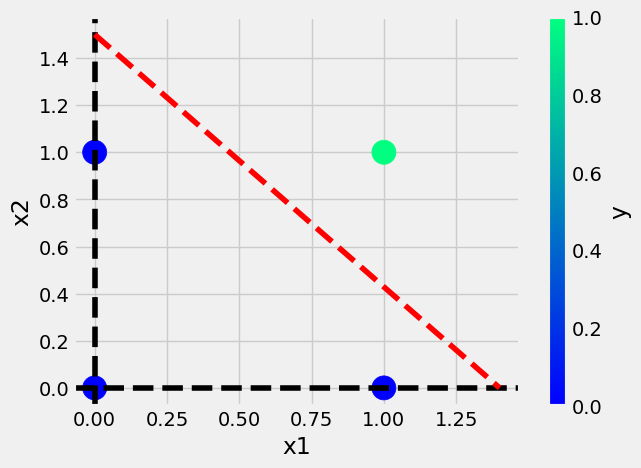

In [98]:
AND.plot(kind="scatter", x="x1", y="x2", c="y",s=300, cmap="winter")
plt.axhline(y=0, color="black",linestyle="--")
plt.axvline(x=0, color="black",linestyle="--")
plt.plot(np.linspace(0,1.4),1.5 - np.linspace(0,1.5),"r--")

#### OR

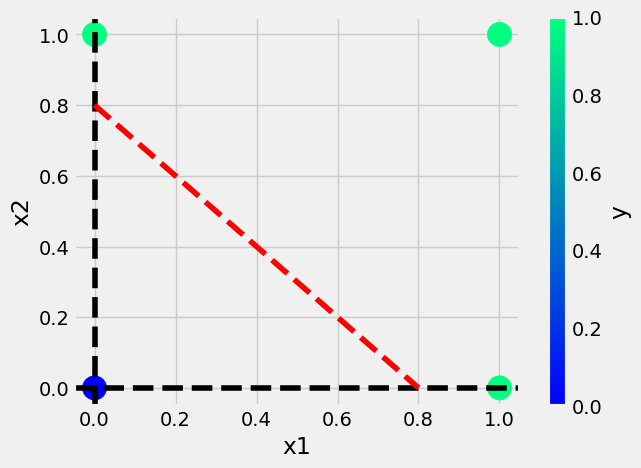

In [105]:
OR.plot(kind="scatter", x="x1", y="x2", c="y",s=300, cmap="winter")
plt.axhline(y=0, color="black",linestyle="--")
plt.axvline(x=0, color="black",linestyle="--")
plt.plot(np.linspace(0,.8),.8 - np.linspace(0,.8),"r--")

#### XOR

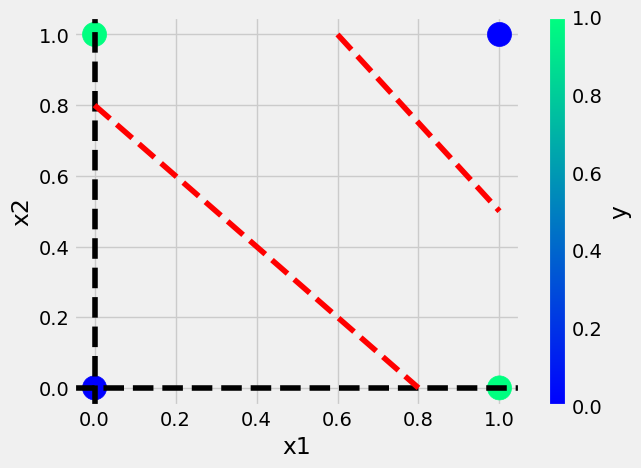

In [116]:
XOR.plot(kind="scatter", x="x1", y="x2", c="y",s=300, cmap="winter")
plt.axhline(y=0, color="black",linestyle="--")
plt.axvline(x=0, color="black",linestyle="--")
plt.plot(np.linspace(0,.8),.8 - np.linspace(0,.8),"r--")
plt.plot(np.linspace(.6,1),1 - np.linspace(0,.5),"r--")

## Questions

Why we use Activation Function in Neural Network?